In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import footballdata as foo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context("notebook")
sns.set_style("darkgrid")

# 2016-17 Forecasts

In [2]:
five38 = foo.FiveThirtyEight()
print(five38.__doc__)

 Provides pandas.DataFrames from the fivethirtyeight.com project
    "2016-17 Club Soccer Predictions"

    Data will be downloaded as necessary and cached locally in ./data

    Original project and background info:
    https://projects.fivethirtyeight.com/soccer-predictions/
    https://fivethirtyeight.com/features/how-our-club-soccer-projections-work/

    Source JSON:
    https://projects.fivethirtyeight.com/soccer-predictions/data.json

    Parameters
    ----------
    leagues : string or iterable of league-ids to include, None for all
    


In [3]:
leagues = five38.read_leagues()
leagues

,champions,league_id,longName,relegated,teams
league,,,,,
Champions League,0,1818,Champions League,0,32
ENG-Premier League,4,2411,Premier League,3,20
ESP-La Liga,4,1869,La Liga,3,20
FRA-Ligue 1,3,1843,Ligue 1,2,20
GER-Bundesliga,4,1845,Bundesliga,2,18
ITA-Serie A,3,1854,Serie A,3,20
MEX-Liga MX,4,1975,Liga MX,1,18
USA-MLS,3,1951,MLS,0,22
USA-NWSL,0,4582,NWSL,0,10


In [4]:
games = five38.read_games()
games.sample(5)

,,,adj_score1,adj_score2,aggregate_winner,chances1,chances2,leg,moves1,moves2,prob1,prob2,...,shootout_winner,status,team1,team1_code,team1_id,team1_sdr_id,team2,team2_code,team2_id,team2_sdr_id
league,datetime,id,,,,,,,,,,,,,,,,,,,,,
ITA-Serie A,2017-05-07 13:00:00,400896512,1.050,0.00,NaN,0.957,1.733,NaN,0.813,0.988,0.1807,0.5938,...,NaN,post,Genoa,GEN,3263,73849,Internazionale,INT,110,73830
USA-MLS,2017-06-25 00:00:00,400934235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4263,0.3143,...,NaN,pre,Minnesota United FC,MNU,17362,108264,Vancouver Whitecaps,VAN,9727,103147
ENG-Premier League,2016-11-19 15:00:00,400881415,1.050,1.05,NaN,1.541,1.097,NaN,1.347,0.862,0.5585,0.1937,...,NaN,post,Everton,EVE,368,73599,Swansea City,SWA,318,73647
FRA-Ligue 1,2017-02-26 20:00:00,400878581,1.050,5.20,NaN,0.848,3.400,NaN,0.563,2.895,0.1203,0.6849,...,NaN,post,Marseille,MRS,176,74431,Paris Saint-Germain,PSG,160,74427
Champions League,2016-11-01 15:45:00,400902981,3.055,1.05,NaN,2.004,1.881,NaN,1.701,1.922,0.3357,0.4365,...,NaN,post,Manchester City,MNC,382,73608,Barcelona,BAR,83,74014


In [5]:
forecasts = five38.read_forecasts()
forecasts.sample(5)

code conference  \
league           last_updated            name                              
USA-MLS          2017-06-11 04:34:17.768 Orlando City SC  ORL    Eastern   
MEX-Liga MX      2017-05-01 00:55:42.436 Toluca           TOL        NaN   
ITA-Serie A      2017-03-07 21:43:35.401 Fiorentina       FIO        NaN   
                 2017-01-22 21:42:34.038 Crotone          CRO        NaN   
Champions League 2017-06-03 20:52:17.111 Basel            BAS        NaN   

                                                          current_losses  \
league           last_updated            name                              
USA-MLS          2017-06-11 04:34:17.768 Orlando City SC               5   
MEX-Liga MX      2017-05-01 00:55:42.436 Toluca                        6   
ITA-Serie A      2017-03-07 21:43:35.401 Fiorentina                    7   
                 2017-01-22 21:42:34.038 Crotone                      14   
Champions League 2017-06-03 20:52:17.111 Basel                         4   

                                                          current_ties  \
league           last_updated            name                            
USA-MLS          2017-06-11 04:34:17.768 Orlando City SC             3   
MEX-Liga MX      2017-05-01 00:55:42.436 Toluca                      2   
ITA-Serie A      2017-03-07 21:43:35.401 Fiorentina                  9   
                 2017-01-22 21:42:34.038 Crotone                     4   
Champions League 2017-06-03 20:52:17.111 Basel                       2   

                                                          current_wins  \
league           last_updated            name                            
USA-MLS          2017-06-11 04:34:17.768 Orlando City SC             7   
MEX-Liga MX      2017-05-01 00:55:42.436 Toluca                      8   
ITA-Serie A      2017-03-07 21:43:35.401 Fiorentina                 11   
                 2017-01-22 21:42:34.038 Crotone                     2   
Champions League 2017-06-03 20:52:17.111 Basel                       0   

                                                          d_rating  \
league           last_updated            name                        
USA-MLS          2017-06-11 04:34:17.768 Orlando City SC   1.83519   
MEX-Liga MX      2017-05-01 00:55:42.436 Toluca            1.54960   
ITA-Serie A      2017-03-07 21:43:35.401 Fiorentina        1.04610   
                 2017-01-22 21:42:34.038 Crotone           1.36312   
Champions League 2017-06-03 20:52:17.111 Basel             1.31309   

                                                          first_round_bye  \
league           last_updated            name                               
USA-MLS          2017-06-11 04:34:17.768 Orlando City SC           0.1007   
MEX-Liga MX      2017-05-01 00:55:42.436 Toluca                       NaN   
ITA-Serie A      2017-03-07 21:43:35.401 Fiorentina                   NaN   
                 2017-01-22 21:42:34.038 Crotone                      NaN   
Champions League 2017-06-03 20:52:17.111 Basel                        NaN   

                                                          goal_diff  \
league           last_updated            name                         
USA-MLS          2017-06-11 04:34:17.768 Orlando City SC   -6.05560   
MEX-Liga MX      2017-05-01 00:55:42.436 Toluca             0.44402   
ITA-Serie A      2017-03-07 21:43:35.401 Fiorentina        12.95412   
                 2017-01-22 21:42:34.038 Crotone          -35.07004   
Champions League 2017-06-03 20:52:17.111 Basel             -9.00000   

                                                          goals_against  \
league           last_updated            name                             
USA-MLS          2017-06-11 04:34:17.768 Orlando City SC       45.28824   
MEX-Liga MX      2017-05-01 00:55:42.436 Toluca                19.56920   
ITA-Serie A      2017-03-07 21:43:35.401 Fiorentina            49.12562   
                 2017-01-22 21:42:34.038 Crotone 

# The most competitive League

The English Premier League is widely regarded as the most competitive football league in the world. Let's compare the EPL to La Liga.

In [6]:
epl_top3_contenders = (forecasts
    .loc['ENG-Premier League']
    .reset_index()
    .assign(top3_chance=lambda x: x.position_1 + x.position_2 + x.position_3)
    .assign(points=lambda x: x.current_wins * 3 + x.current_ties)
    .sort_values(['last_updated', 'points'], ascending=False)
    )

epl_top3_contenders.head()

,last_updated,name,code,conference,current_losses,current_ties,current_wins,d_rating,first_round_bye,goal_diff,...,position_8,position_9,relegated,sdr_id,ties,win_final,win_league,wins,top3_chance,points
723,2017-05-21 15:58:38.176,Chelsea,CHE,NaN,5,3,30,0.75055,NaN,52.0,...,0.0,0.0,0.0,73598,3.0,NaN,1.0,30.0,1.0,93
736,2017-05-21 15:58:38.176,Tottenham Hotspur,TOT,NaN,4,8,26,0.67874,NaN,60.0,...,0.0,0.0,0.0,73602,8.0,NaN,0.0,26.0,1.0,86
729,2017-05-21 15:58:38.176,Manchester City,MNC,NaN,6,9,23,0.72773,NaN,41.0,...,0.0,0.0,0.0,73608,9.0,NaN,0.0,23.0,1.0,78
728,2017-05-21 15:58:38.176,Liverpool,LIV,NaN,6,10,22,0.84054,NaN,36.0,...,0.0,0.0,0.0,73600,10.0,NaN,0.0,22.0,0.0,76
721,2017-05-21 15:58:38.176,Arsenal,ARS,NaN,9,6,23,1.00141,NaN,33.0,...,0.0,0.0,0.0,73616,6.0,NaN,0.0,23.0,0.0,75


Halfway through the season, at least five teams had a shot at making the top 3 of the Premier League:

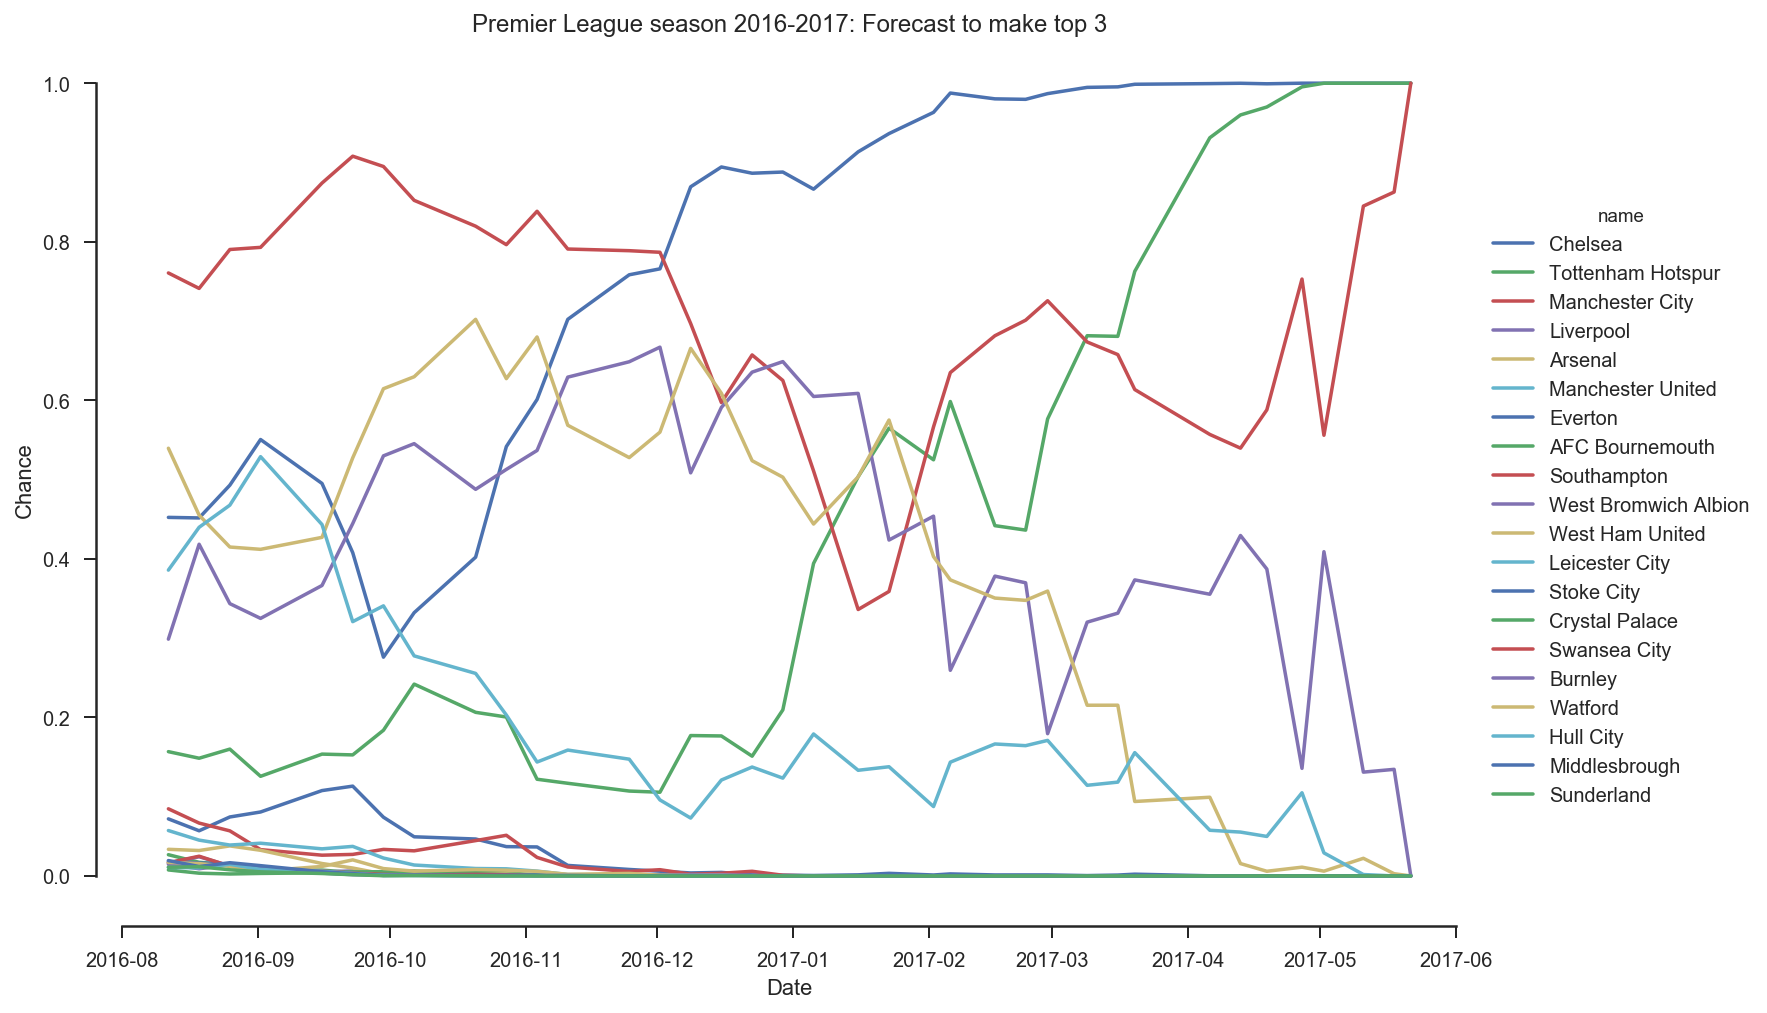

In [7]:
pal = sns.color_palette(n_colors=len(epl_top3_contenders.name.unique()))

sns.set_style("ticks")

g = sns.FacetGrid(epl_top3_contenders, hue='name', size=7, aspect=1.5, palette=pal)
g.map(plt.plot, 'last_updated', 'top3_chance').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Chance',
         title='Premier League season 2016-2017: Forecast to make top 3')
sns.despine(offset=5, trim=True);

...while as usual, La Liga showed a very different picture:

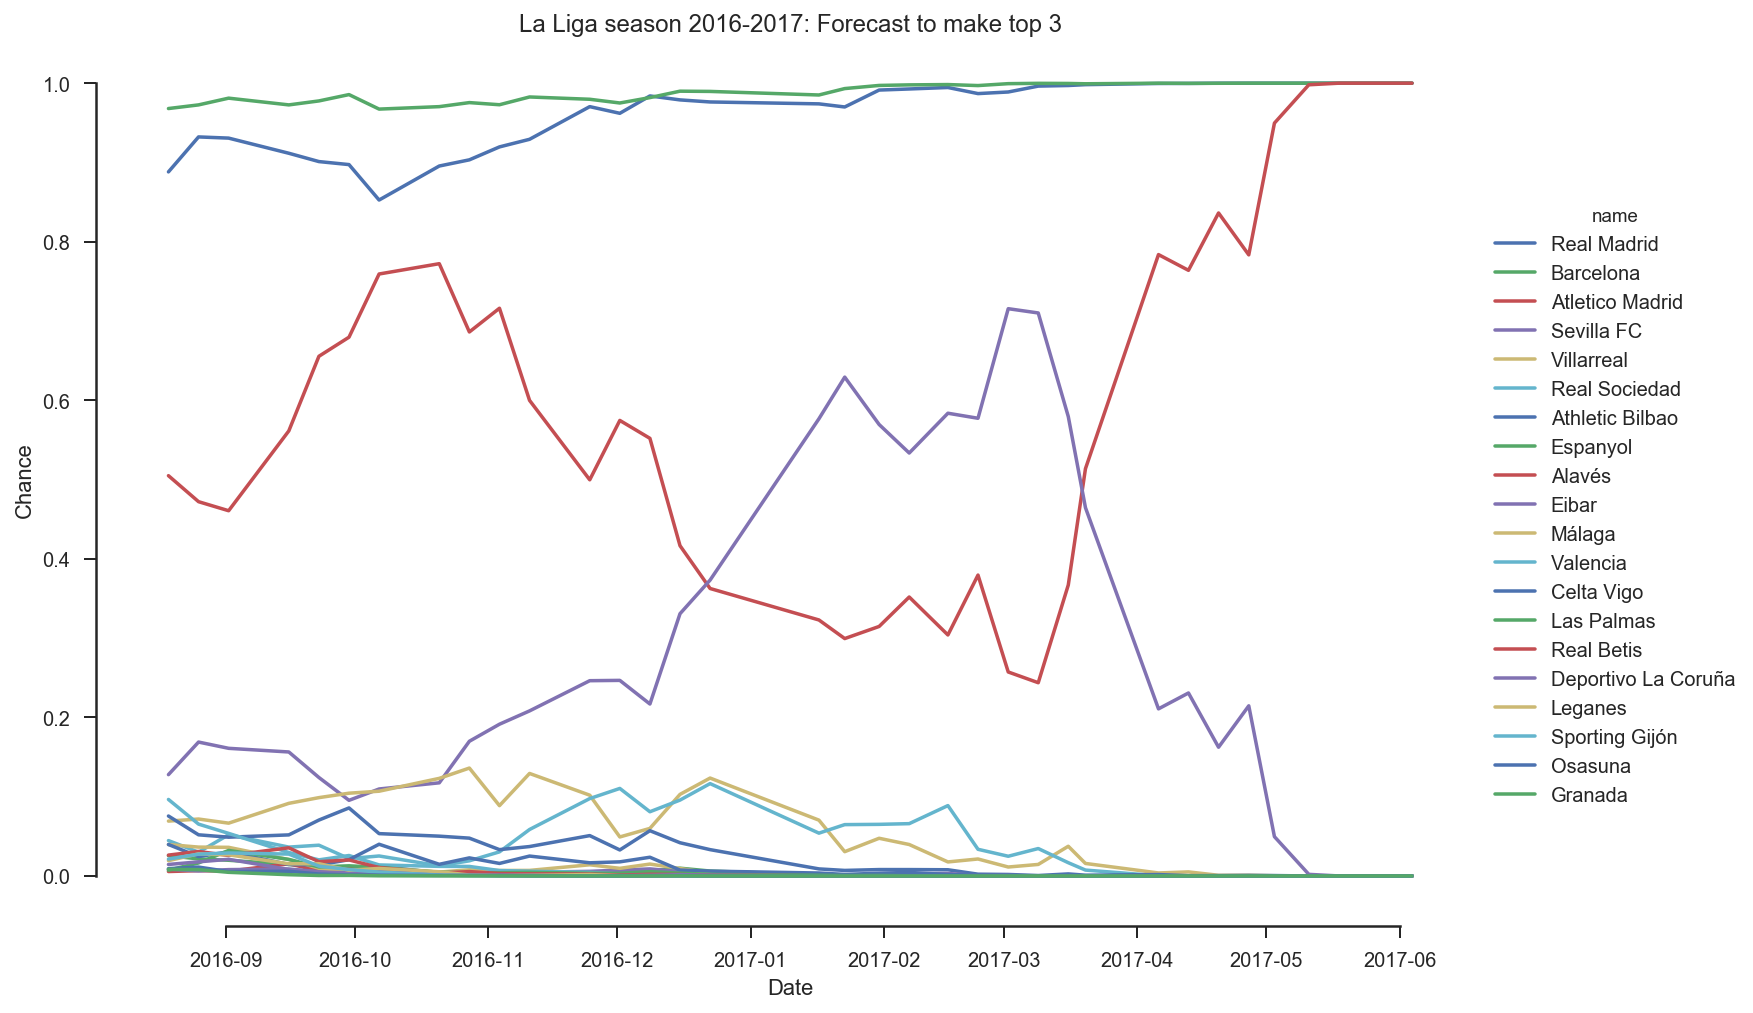

In [8]:
laliga_top3_contenders = (forecasts
    .loc['ESP-La Liga']
    .reset_index()
    .assign(top3_chance=lambda x: x.position_1 + x.position_2 + x.position_3)
    .assign(points=lambda x: x.current_wins * 3 + x.current_ties)
    .sort_values(['last_updated', 'points'], ascending=False)
    )

pal = sns.color_palette(n_colors=len(laliga_top3_contenders.name.unique()))

sns.set_style("ticks")

g = sns.FacetGrid(laliga_top3_contenders, hue='name', size=7, aspect=1.5, palette=pal)
g.map(plt.plot, 'last_updated', 'top3_chance').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Chance',
         title='La Liga season 2016-2017: Forecast to make top 3')
sns.despine(offset=5, trim=True);

When we look at actually winning La Liga, only Real and Barça ever had a chance. This has been the case for many years now in La Liga, so no surprise there.

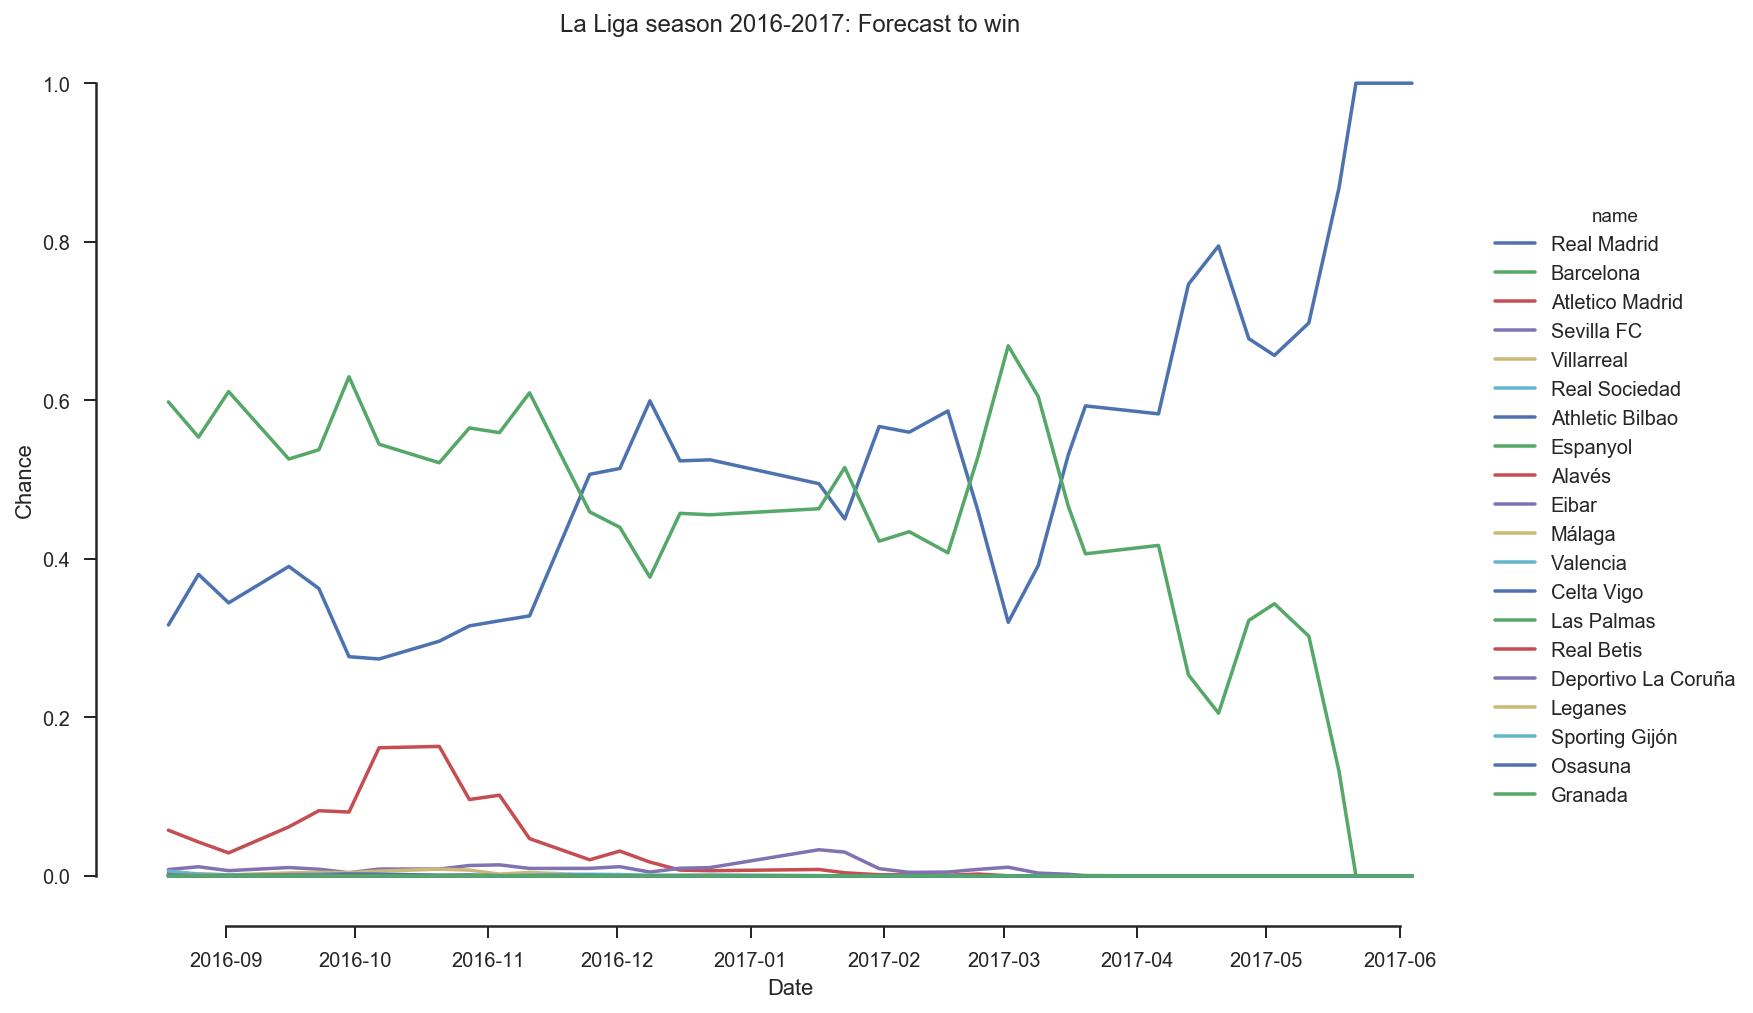

In [9]:
laliga_win_contenders = (forecasts
    .loc['ESP-La Liga']
    .reset_index()
    .assign(points=lambda x: x.current_wins * 3 + x.current_ties)
    .sort_values(['last_updated', 'points'], ascending=False)
    )

pal = sns.color_palette(n_colors=len(laliga_top3_contenders.name.unique()))

sns.set_style("ticks")

g = sns.FacetGrid(laliga_win_contenders, hue='name', size=7, aspect=1.5, palette=pal)
g.map(plt.plot, 'last_updated', 'position_1').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Chance',
         title='La Liga season 2016-2017: Forecast to win')
sns.despine(offset=5, trim=True);

...But the EPL winner for this season was decided as early as December:

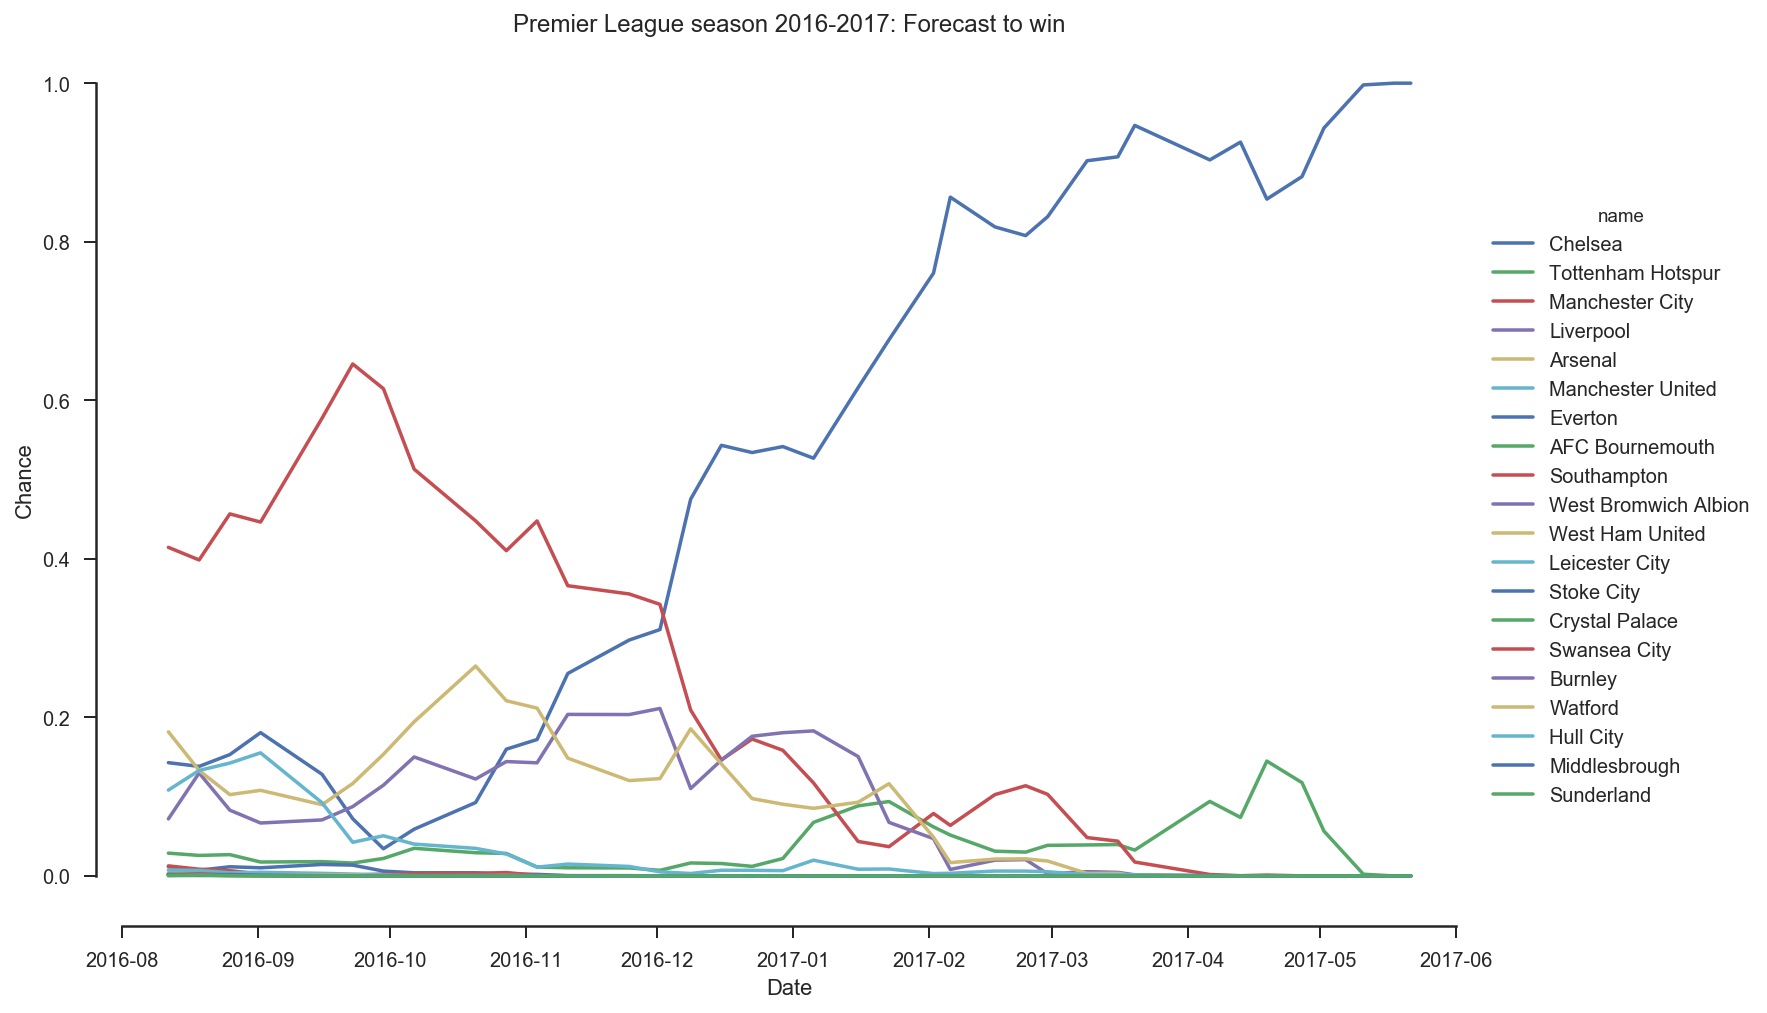

In [10]:
epl_win_contenders = (forecasts
    .loc['ENG-Premier League']
    .reset_index()
    .assign(points=lambda x: x.current_wins * 3 + x.current_ties)
    .sort_values(['last_updated', 'points'], ascending=False)
    )

pal = sns.color_palette(n_colors=len(laliga_top3_contenders.name.unique()))

sns.set_style("ticks")

g = sns.FacetGrid(epl_win_contenders, hue='name', size=7, aspect=1.5, palette=pal)
g.map(plt.plot, 'last_updated', 'position_1').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Chance',
         title='Premier League season 2016-2017: Forecast to win')
sns.despine(offset=5, trim=True);

# Match history

In [11]:
print(foo.MatchHistory.__doc__)

Provides pandas.DataFrames from CSV files available at
    http://www.football-data.co.uk/data.php

    Column names are explained here: http://www.football-data.co.uk/notes.txt

    Data will be downloaded as necessary and cached locally in ./data

    Parameters
    ----------
    leagues : string or iterable of league-ids to include, None for all
    seasons : string, int or list of seasons. Examples:
              '16-17'; 2016; '2016-17'; [14, 15, 16]
    


In [12]:
foo.MatchHistory.available_leagues()

['BEL-Jupiler League',
 'ENG-Championship',
 'ENG-Conference',
 'ENG-League 1',
 'ENG-League 2',
 'ENG-Premier League',
 'ESP-La Liga',
 'ESP-La Liga 2',
 'FRA-Ligue 1',
 'FRA-Ligue 2',
 'GER-Bundesliga',
 'GER-Bundesliga 2',
 'GRE-Ethniki Katigoria',
 'ITA-Serie A',
 'ITA-Serie B',
 'NED-Eredivisie',
 'POR-Liga 1',
 'SCO-Division 1',
 'SCO-Division 2',
 'SCO-Division 3',
 'SCO-Premier League',
 'TUR-Ligi 1']

# Home team advantage in the Dutch Eredivisie

We all know sports teams have an advantage when playing at home. Here's a look at home team advantage for 3 years of the Eredivisie, inspired by [this great example](https://tomaugspurger.github.io/modern-5-tidy.html) by Tom Augspurger.

Travel distances in the Netherlands are small, it would be interesting to compare this to competitions where the away team often have to travel further.

In [13]:
eredivisie = foo.MatchHistory('NED-Eredivisie', range(2014, 2017)).read_games()
eredivisie.sample(5)

index      AwayTeam  \
league         season game_id                                                   
NED-Eredivisie 1516   2015-11-21 Ajax-Cambuur               108       Cambuur   
                      2015-09-19 PEC Zwolle-ADO Den Haag     49  ADO Den Haag   
                      2016-04-10 FC Groningen-Graafschap    266    Graafschap   
               1617   2016-10-01 Roda JC-NEC Nijmegen        66  NEC Nijmegen   
                      2017-04-01 AZ Alkmaar-FC Groningen    243  FC Groningen   

                                                          B365A  B365D  B365H  \
league         season game_id                                                   
NED-Eredivisie 1516   2015-11-21 Ajax-Cambuur             17.00   6.50   1.17   
                      2015-09-19 PEC Zwolle-ADO Den Haag   3.60   3.75   1.91   
                      2016-04-10 FC Groningen-Graafschap   4.75   3.80   1.70   
               1617   2016-10-01 Roda JC-NEC Nijmegen      3.60   3.30   2.05   
                      2017-04-01 AZ Alkmaar-FC Groningen   5.50   3.80   1.62   

                                                           BWA  BWD   BWH  \
league         season game_id                                               
NED-Eredivisie 1516   2015-11-21 Ajax-Cambuur             9.25  7.5  1.19   
                      2015-09-19 PEC Zwolle-ADO Den Haag  3.75  3.5  1.90   
                      2016-04-10 FC Groningen-Graafschap  4.75  3.7  1.67   
               1617   2016-10-01 Roda JC-NEC Nijmegen     3.25  3.4  2.10   
                      2017-04-01 AZ Alkmaar-FC Groningen  5.00  3.9  1.62   

                                                          Bb1X2  BbAH  ...   \
league         season game_id                                          ...    
NED-Eredivisie 1516   2015-11-21 Ajax-Cambuur                44    25  ...    
                      2015-09-19 PEC Zwolle-ADO Den Haag     41    26  ...    
                      2016-04-10 FC Groningen-Graafschap     47    25  ...    
               1617   2016-10-01 Roda JC-NEC Nijmegen        57    29  ...    
                      2017-04-01 AZ Alkmaar-FC Groningen     45    20  ...    

                                                           PSH  SJA  SJD  SJH  \
league         season game_id                                                   
NED-Eredivisie 1516   2015-11-21 Ajax-Cambuur             1.20  NaN  NaN  NaN   
                      2015-09-19 PEC Zwolle-ADO Den Haag  1.93  NaN  NaN  NaN   
                      2016-04-10 FC Groningen-Graafschap  1.79  NaN  NaN  NaN   
               1617   2016-10-01 Roda JC-NEC Nijmegen     2.16  NaN  NaN  NaN   
                      2017-04-01 AZ Alkmaar-FC Groningen  1.68  NaN  NaN  NaN   

                                                           VCA  VCD   VCH  \
league         season game_id                                               
NED-Eredivisie 1516   2015-11-21 Ajax-Cambuur             17.0  7.5  1.17   
                      2015-09-19 PEC Zwolle-ADO Den Haag   3.9  3.8  1.93   
                      2016-04-10 FC Groningen-Graafschap   4.6  3.8  1.75   
               1617   2016-10-01 Roda JC-NEC Nijmegen      3.4  3.5  2.15   
                      2017-04-01 AZ Alkmaar-FC Groningen   4.8  4.2  1.65   

                                                            WHA   WHD   WHH  
league         season game_id                                                
NED-Eredivisie 1516   2015-11-21 Ajax-Cambuur             13.00  6.00  1.18  
                      2015-09-19 PEC Zwolle-ADO Den Haag   3.40  3.50  1.95  
                      2016-04-10 FC Groningen-Graafschap   4.50  3.75  1.67  
               1617   2016-10-01 Roda JC-NEC Nijmegen      3.25  3.40  2.05  
                      2017-04-01 AZ Alkmaar-FC Groningen   4.50  4.00  1.62  

[5 rows x 55 columns]

In [14]:
def home_away_results(games: pd.DataFrame):
    """Returns aggregated home/away results per team"""
    
    res = (
        pd.melt(games.reset_index(),
                id_vars=['Date', 'FTR'],
                value_name='team', var_name='is_home',
                value_vars=['HomeTeam', 'AwayTeam']))

    res.is_home = res.is_home.replace(['HomeTeam', 'AwayTeam'], ['Home', 'Away'])
    res['win'] = res['lose'] = res['draw'] = 0
    res.loc[(res['is_home'] == 'Home') & (res['FTR'] == 'H'), 'win'] = 1
    res.loc[(res['is_home'] == 'Away') & (res['FTR'] == 'A'), 'win'] = 1
    res.loc[(res['is_home'] == 'Home') & (res['FTR'] == 'A'), 'lose'] = 1
    res.loc[(res['is_home'] == 'Away') & (res['FTR'] == 'H'), 'lose'] = 1
    res.loc[res['FTR'] == 'D', 'draw'] = 1

    g = res.groupby(['team', 'is_home'])
    w = (g.win.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_win', 'mean': 'win_pct'}))
    l = (g.lose.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_lose', 'mean': 'lose_pct'}))
    d = (g.draw.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_draw', 'mean': 'draw_pct'}))

    res = pd.concat([w, l, d], axis=1)
    return res

In [15]:
results = home_away_results(eredivisie)
results.head(6)

n_win   win_pct  n_lose  lose_pct  n_draw  draw_pct
team         is_home                                                     
ADO Den Haag Away        11  0.215686      27  0.529412      13  0.254902
             Home        19  0.372549      17  0.333333      15  0.294118
AZ Alkmaar   Away        25  0.490196      17  0.333333       9  0.176471
             Home        24  0.470588      13  0.254902      14  0.274510
Ajax         Away        32  0.627451       6  0.117647      13  0.254902
             Home        39  0.764706       4  0.078431       8  0.156863

The overall picture shows most teams have a clear advantage at home:

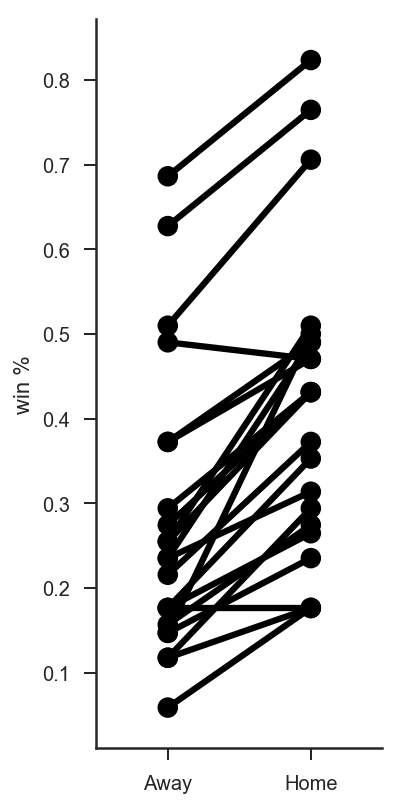

In [16]:
g = sns.FacetGrid(results.reset_index(), hue='team', palette=['k'], size=6, aspect=.5)
g.map(sns.pointplot, 'is_home', 'win_pct', scatter_kws={'alpha':0.3})
g.set_axis_labels('', 'win %');

But there are a few exceptions, namely AZ and NAC Breda. 

Now NAC win only about 17% of their games overall, so not much so say there. But AZ is a top 5 contender who in the past 3 years have won more games away than at home. Meanwhile have a look at NEC Nijmegen's home-away difference: their supporters seem to ben doing a much better job.

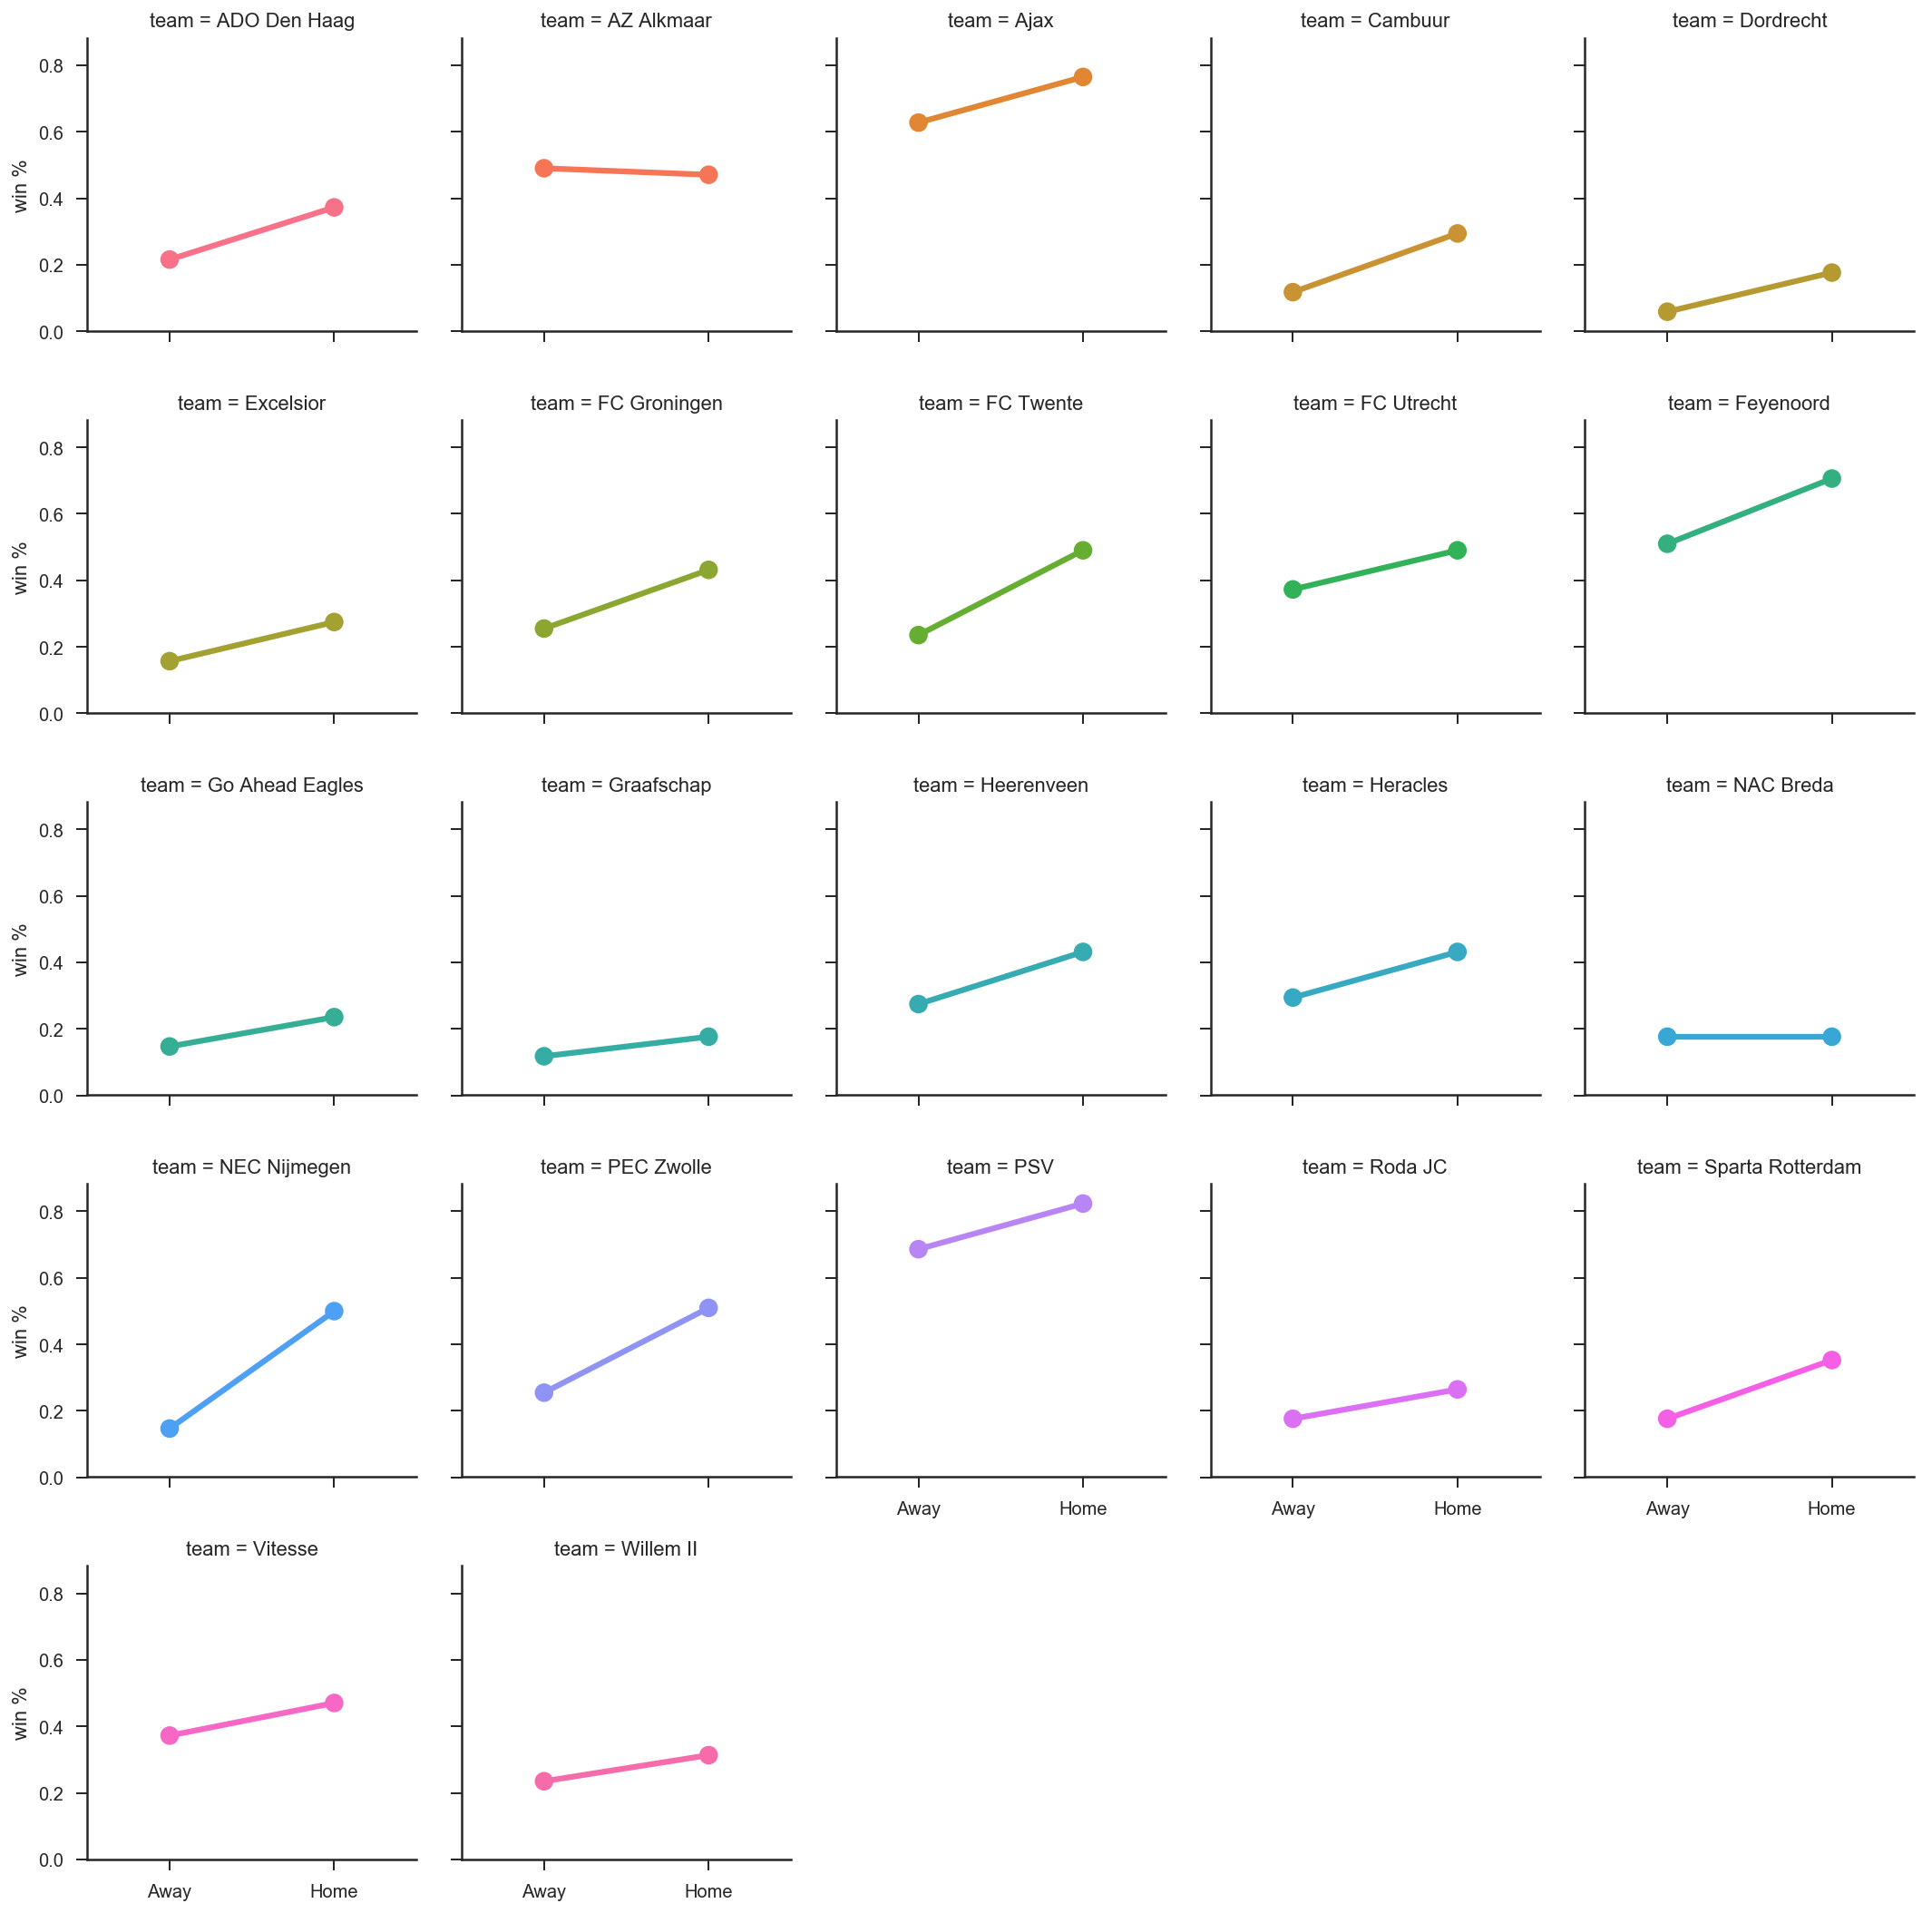

In [17]:
g = sns.FacetGrid(results.reset_index(), 
                  col='team', hue='team', col_wrap=5)
g.map(sns.pointplot, 'is_home', 'win_pct')
#  g.fig.subplots_adjust(wspace=.2, hspace=.2)
g.set_axis_labels('', 'win %');

In [18]:
results.loc['NEC Nijmegen']

,n_win,win_pct,n_lose,lose_pct,n_draw,draw_pct
is_home,,,,,,
Away,5,0.147059,21,0.617647,8,0.235294
Home,17,0.500000,11,0.323529,6,0.176471


# ClubElo

How did the current top 5 teams in the world develop over time?

In [19]:
elo = foo.ClubElo()
current_elo = elo.read_by_date()
current_elo.head(10)

,index,Rank,Country,Level,Elo,From,To
Team,,,,,,,
Real Madrid,0,1,ESP,1,2080.932861,2017-06-04,2017-08-19
Barcelona,1,2,ESP,1,2019.554932,2017-06-04,2017-08-19
Bayern,2,3,GER,1,1996.681396,2017-05-21,2017-08-19
Atletico,3,4,ESP,1,1950.027954,2017-06-04,2017-08-19
Juventus,4,5,ITA,1,1940.884277,2017-06-04,2017-08-19
Chelsea,5,6,ENG,1,1906.441650,2017-05-25,2017-08-12
Tottenham,6,7,ENG,1,1884.536255,2017-05-25,2017-08-12
Paris SG,7,8,FRA,1,1873.994385,2017-05-21,2017-08-05
Monaco,8,9,FRA,1,1871.510254,2017-05-21,2017-08-05


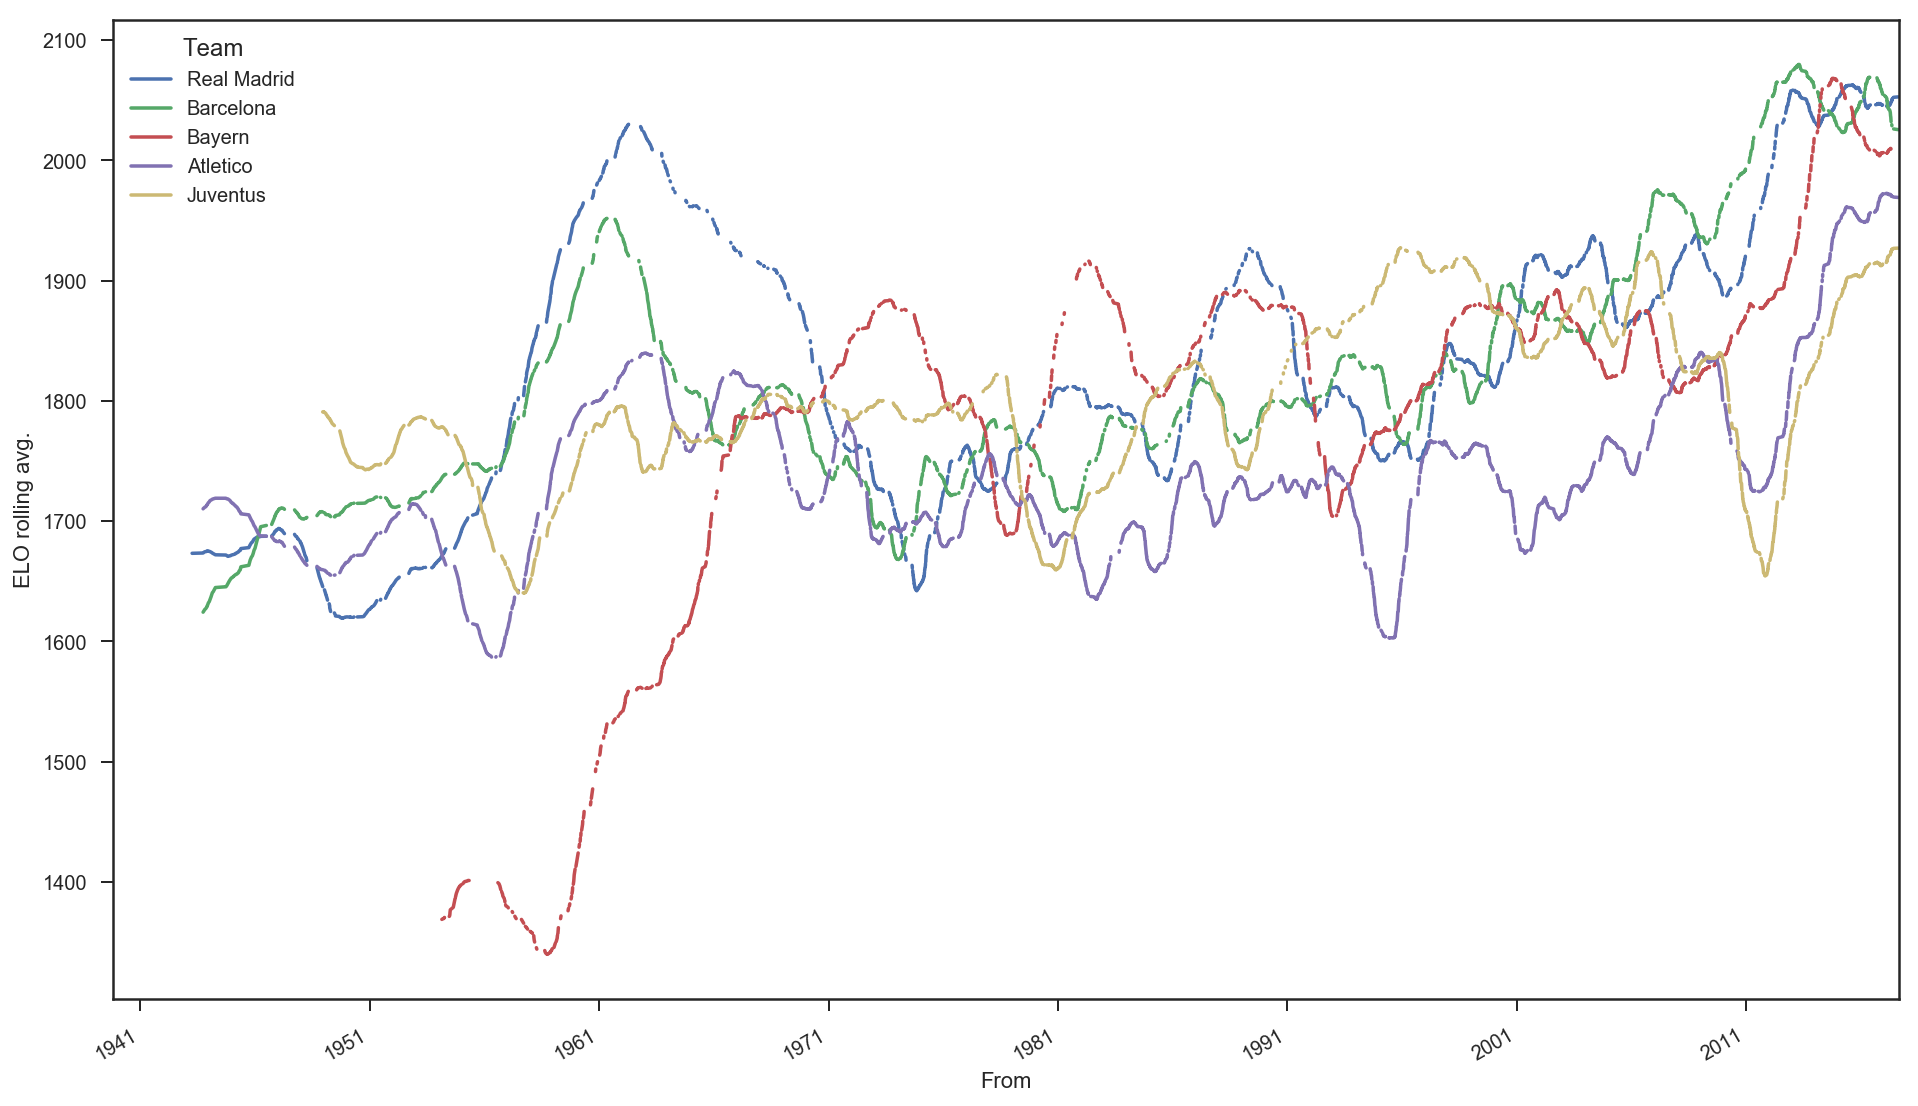

In [20]:
num_teams = 5
smoothing = 100
elo_top_development = pd.concat(
    [elo.read_team_history(team)['Elo'].rolling(smoothing).mean()
     for team in current_elo.reset_index()['Team'][:num_teams]
    ],
    axis=1)
elo_top_development.columns = current_elo.reset_index()['Team'][:num_teams]
elo_top_development.fillna(method='ffill')

fig = plt.figure(figsize=(16, 10))
ax1 = fig.add_subplot(111, ylabel='ELO rolling avg.', xlabel='Date')
elo_top_development.plot(ax=ax1);